In [5]:
import torch
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
import json
from torchvision import models
import torch.nn as nn
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

In [6]:
device = torch.device("cud" if torch.cuda.is_available() else "cpu")
device

RuntimeError: Expected one of cpu, cuda, ipu, xpu, mkldnn, opengl, opencl, ideep, hip, ve, fpga, maia, xla, lazy, vulkan, mps, meta, hpu, mtia, privateuseone device type at start of device string: cude

In [7]:
val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])
test_dataset = ImageFolder(root="/content/drive/MyDrive/Research paper on cnn and ensemble learning/Dataset/Splitted_dataset/test", transform=val_test_transforms)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [8]:
metrics = [
    json.load(open("/content/drive/MyDrive/Research paper on cnn and ensemble learning/Results/metrics_resnet34.json")),
    json.load(open("/content/drive/MyDrive/Research paper on cnn and ensemble learning/Results/metrics_resnet50.json")),
    json.load(open("/content/drive/MyDrive/Research paper on cnn and ensemble learning/Results/metrics_efficientnet_b0.json"))

]

In [9]:
metrics

[{'model': 'resnet34',
  'test_accuracy': 0.7586891757696127,
  'test_f1': 0.7448794121784864},
 {'model': 'resnet50',
  'test_accuracy': 0.7646474677259185,
  'test_f1': 0.7477046421002169},
 {'model': 'efficientnet_b0',
  'test_accuracy': 0.7477656405163853,
  'test_f1': 0.7243689008255938}]

In [10]:
f1_scores = np.array([m["test_f1"] for m in metrics])
f1_scores

array([0.74487941, 0.74770464, 0.7243689 ])

## finding the weights from f1 scores to make normalized weights for the emsemble

In [11]:
weights = f1_scores / f1_scores.sum()
weights

array([0.33599243, 0.33726681, 0.32674076])

## loading all the models

#ResNet34

In [12]:
resnet34 = models.resnet34(pretrained = False)
resnet34.fc = nn.Linear(resnet34.fc.in_features, 7)
resnet34.load_state_dict(torch.load("/content/drive/MyDrive/Research paper on cnn and ensemble learning/Models/resnet34_best.pth", map_location=device))
resnet34.to(device).eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

#ResNet50

In [ ]:
resnet50 = models.resnet50(pretrained = False)
resnet50.fc = nn.Linear(resnet50.fc.in_features, 7)
resnet50.load_state_dict(torch.load("/content/drive/MyDrive/Research paper on cnn and ensemble learning/Models/resnet50_best.pth", map_location=device))
resnet50.to(device).eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

#EfficientNet

In [ ]:
effnet = models.efficientnet_b0(pretrained=False)
effnet.classifier[1] = nn.Linear(effnet.classifier[1].in_features, 7)
effnet.load_state_dict(torch.load("/content/drive/MyDrive/Research paper on cnn and ensemble learning/Models/efficientnet_b0_best.pth", map_location=device))
effnet.to(device).eval()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
models_list = [resnet34, resnet50, effnet]

In [ ]:
all_preds = []
all_labels = []

with torch.no_grad():
  for imgs, labels in tqdm(test_loader):
    imgs, labels = imgs.to(device), labels.to(device)

    probs = [F.softmax(m(imgs), dim=1) for m in models_list]

    weighted_prods = sum(w * p for w, p in zip(weights, probs))

    preds = torch.argmax(weighted_prods, 1)
    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())


100%|██████████| 16/16 [09:09<00:00, 34.35s/it]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [ ]:
ensemble_acc = accuracy_score(all_labels, all_preds)
print(f"Ensemble Accureacy: {ensemble_acc:.4f}")

Ensemble Accureacy: 0.7974


In [ ]:
ensemble_f1  = f1_score(all_labels, all_preds, average='weighted')
print(f"Ensemble Weighted F1: {ensemble_f1:.4f}")

Ensemble Weighted F1: 0.7782


In [ ]:
classification_report(all_labels, all_preds)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.70      0.21      0.32        34\n           1       0.73      0.71      0.72        52\n           2       0.58      0.56      0.57       111\n           3       0.00      0.00      0.00        12\n           4       0.61      0.46      0.53       112\n           5       0.85      0.95      0.90       671\n           6       0.88      0.47      0.61        15\n\n    accuracy                           0.80      1007\n   macro avg       0.62      0.48      0.52      1007\nweighted avg       0.78      0.80      0.78      1007\n'

In [ ]:
with open("/content/drive/MyDrive/Research paper on cnn and ensemble learning/Results/metrics_ensemble.json", "w") as f:
    json.dump({
        "model": "weighted_ensemble",
        "test_accuracy": float(ensemble_acc),
        "test_f1": float(ensemble_f1),
        "weights": weights.tolist()
    }, f, indent=4)

print("\n✅ Ensemble metrics saved to metrics_ensemble.json")


✅ Ensemble metrics saved to metrics_ensemble.json


In [ ]:
!pip install torchcam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 81.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatib

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from torchcam.methods import SmoothGradCAMpp
from torchcam.utils import overlay_mask


In [ ]:
def show_gradcam(model, image_path, target_layer, class_names):
    model.eval()

    # Preprocessing
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    img = Image.open(image_path).convert("RGB")
    input_tensor = transform(img).unsqueeze(0).to(device)

    # Grad-CAM extraction
    cam_extractor = SmoothGradCAMpp(model, target_layer)

    out = model(input_tensor)
    pred_class = out.argmax(dim=1).item()
    cams = cam_extractor(pred_class, out)
    grayscale_cam = cams[0].squeeze().cpu()

    # Visualization
    heatmap = overlay_mask(img, transforms.ToPILImage()(grayscale_cam), alpha=0.5)
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1); plt.imshow(img); plt.title("Original")
    plt.subplot(1,2,2); plt.imshow(heatmap); plt.title(f"Grad-CAM → {class_names[pred_class]}")
    plt.show()


In [ ]:
class_names = test_dataset.classes

img_path = "/content/drive/MyDrive/Research paper on cnn and ensemble learning/Dataset/Splitted_dataset/test/nv/ISIC_0030957.jpg"

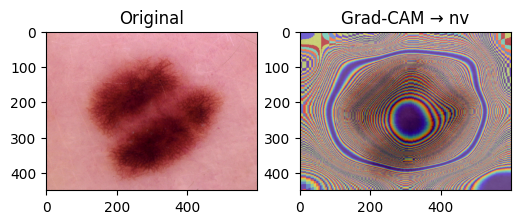

In [ ]:
show_gradcam(resnet34, img_path, target_layer='layer4', class_names=class_names)


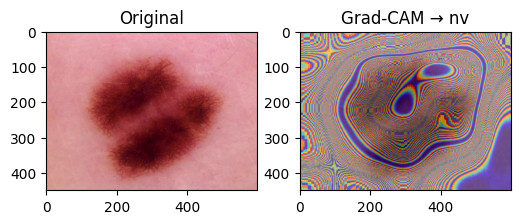

In [ ]:
show_gradcam(resnet50, img_path, target_layer='layer4', class_names=class_names)

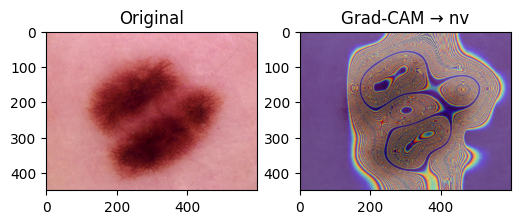

In [ ]:
show_gradcam(effnet, img_path, target_layer='features.6', class_names=class_names)


In [ ]:
def ensemble_gradcam(img_path, models, weights, layers, class_names):
    img = Image.open(img_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485,0.456,0.406],
                             std=[0.229,0.224,0.225])
    ])
    input_tensor = transform(img).unsqueeze(0).to(device)

    cams, preds = [], []
    for model, layer in zip(models, layers):
        model.eval()
        cam_extractor = SmoothGradCAMpp(model, layer)
        out = model(input_tensor)
        preds.append(out.softmax(dim=1))
        pred_class = out.argmax(dim=1).item()
        cams.append(cam_extractor(pred_class, out)[0].squeeze().cpu())

    # Weighted average CAM
    ensemble_cam = sum(w * c for w, c in zip(weights, cams))
    heatmap = overlay_mask(img, transforms.ToPILImage()(ensemble_cam), alpha=0.5)

    weighted_pred = sum(w * p for w, p in zip(weights, preds))
    pred_idx = weighted_pred.argmax(dim=1).item()

    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1); plt.imshow(img); plt.title("Original")
    plt.subplot(1,2,2); plt.imshow(heatmap); plt.title(f"Ensemble → {class_names[pred_idx]}")
    plt.show()


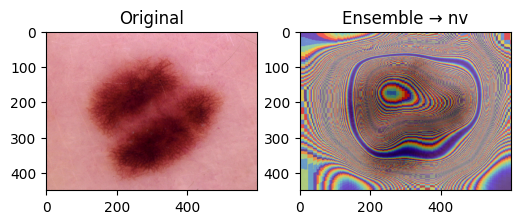

In [ ]:
ensemble_gradcam(img_path,
                 models=[resnet34, resnet50, effnet],
                 weights=weights,
                 layers=['layer4','layer4','features.6'],
                 class_names=class_names)